
## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>.

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

###Importing libraries

In [112]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

###Dataset loading

In [113]:
# Mounting gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
# Loading the dataset
df_cardekho = pd.read_csv('/content/drive/MyDrive/Dataset/Car_data/CAR DETAILS FROM CAR DEKHO.csv')
df_car_details = pd.read_csv('/content/drive/MyDrive/Dataset/Car_data/Car details v3.csv')
df_car_data = pd.read_csv('/content/drive/MyDrive/Dataset/Car_data/car data.csv')

###Let's look out the dataset

In [115]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [116]:
df_car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [117]:
df_car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


###let's check dataset info

In [118]:
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [119]:
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [120]:
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


###Let's describe the dataset and see dataset description

In [121]:
df_cardekho.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [122]:
df_car_details.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [123]:
df_car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


*We can see datasets 'cardekho' and 'car_data' doesn't consist null values whie 'car_details' contains some null values.*

***Our goal is to predict the selling prices of cars listed on CarDekho.com. Therefore, we need to concentrate on the 'cardekho' dataset, conducting thorough analysis and visualization to gain insights and improve our predictive models.***

In [124]:
# Duplicate values count
df_cardekho.duplicated().sum()

763

*As we can see there are some duplicate records in our dataset, we need to remove these because duplicate records doesn't give any further information and creates problem while analyzing dataset.*

In [125]:
# Dropping duplicates
df_cardekho.drop_duplicates(keep='first', inplace=True)

In [126]:
df_cardekho.reset_index(inplace=True)

In [127]:
df_cardekho.drop('index', axis=1, inplace=True)

In [128]:
df_cardekho

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [129]:
# Columns
df_cardekho.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [130]:
# Dataset Information
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 223.7+ KB


In [131]:
# Dataset Description
df_cardekho.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


***With our data now free of null/missing values and duplicates, we can proceed to the Exploratory Data Analysis (EDA) phase.***

###Exploratory Aata Analysis

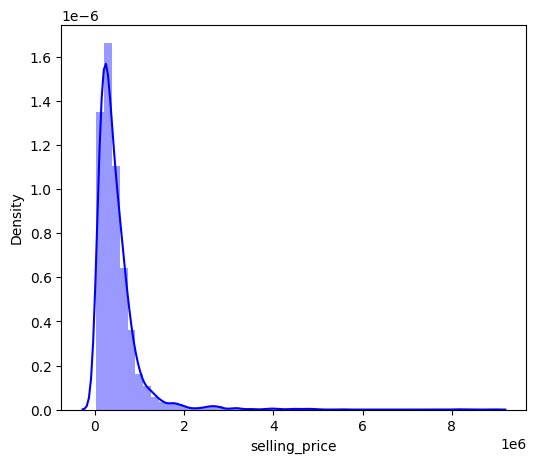

In [132]:
# Numerical Data

# First let's plot our dependent variable (selling_price)
plt.figure(figsize=(6,5))
sns.distplot(df_cardekho['selling_price'], color='b')
plt.show()

As we can see 'selling_price' is in 10^6 so our graph is moving towards y-axis whick makes it positively skewed and we can not get any better visualization with these type of graph. Taking a log of the dependent variable will give us more clarification about the data and help us visualize in a better way.

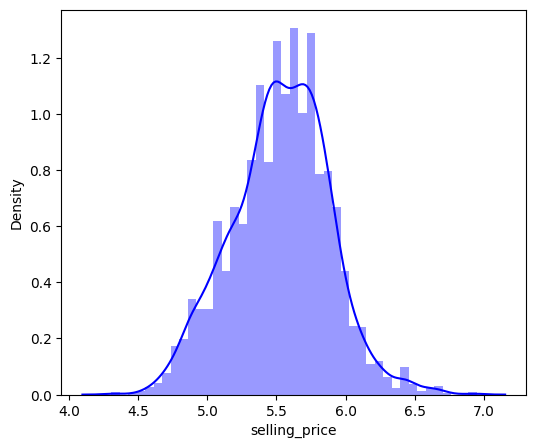

In [133]:
# Taking log of dependent variable and plotting
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df_cardekho['selling_price']), color='b')
plt.show()

In [134]:
# Numeric Features
numeric_features = df_cardekho.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

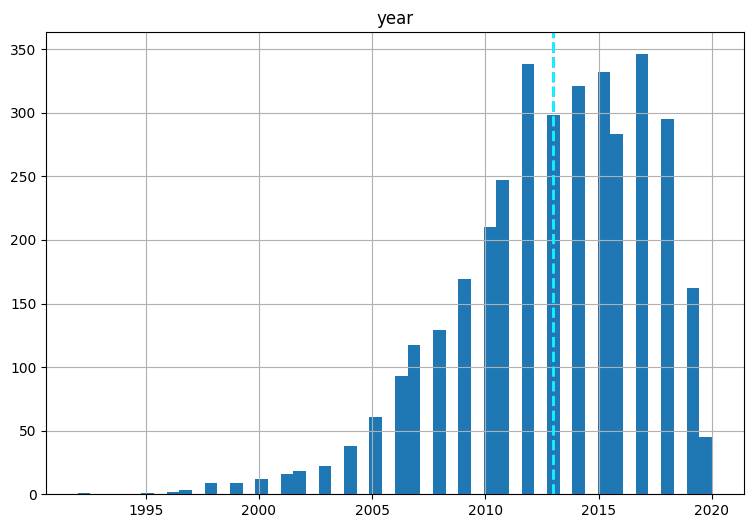

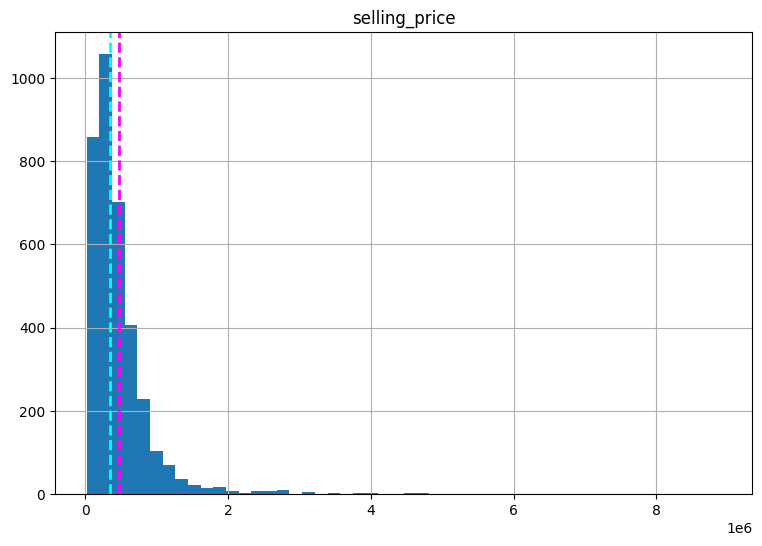

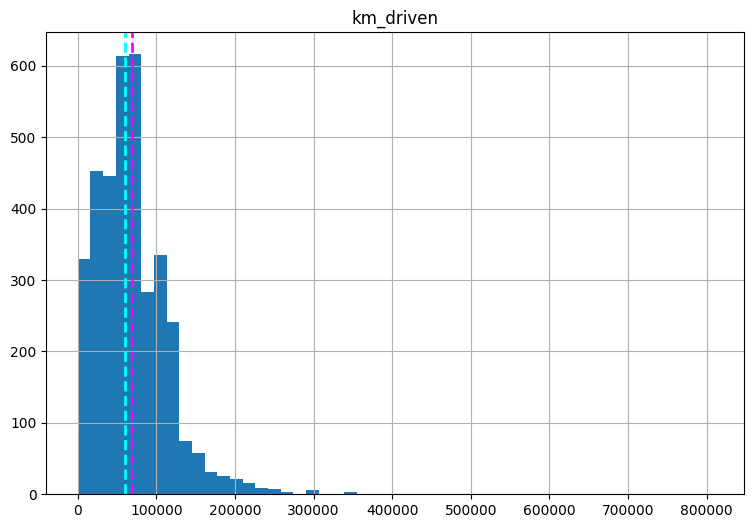

In [135]:
# Plotting hist plot for each numeric feature count
for column in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df_cardekho[column]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(column)
plt.show()

The plots above reveal that the numeric data exhibits right skewness and left skewness in some columns. To address this, we will transform the data to achieve a normal distribution and then visualize the results.

###Transformation
Following are some methods for transforming data - <br>
**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

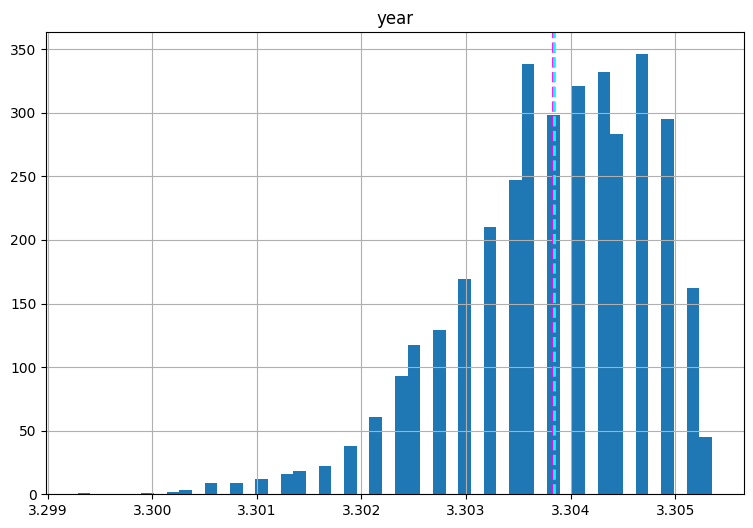

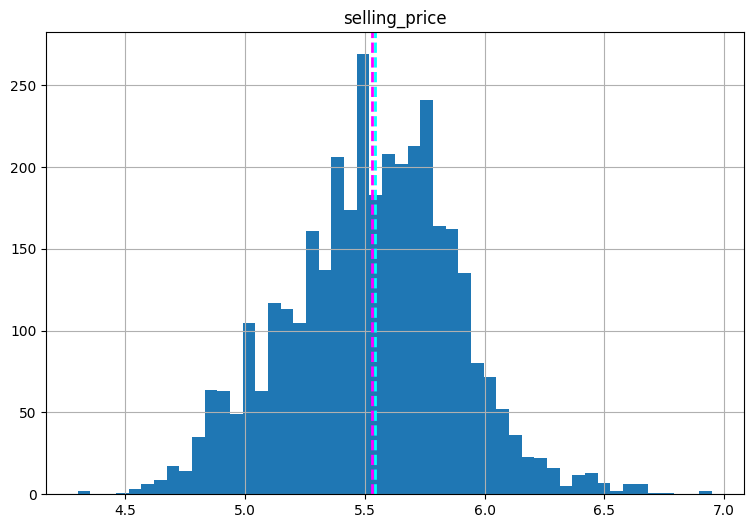

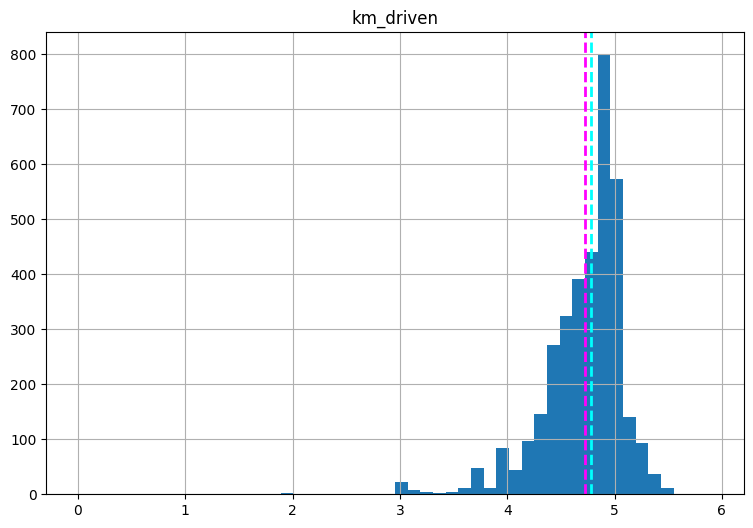

In [136]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = np.log10(df_cardekho[col])
    feature.hist(bins=50, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Let's plot scatter plot between dependent and independent variables and figure out the relationship between them.

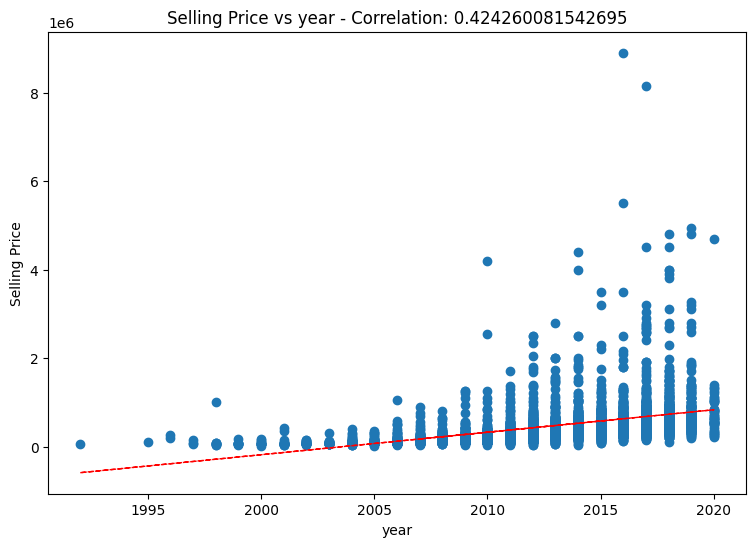

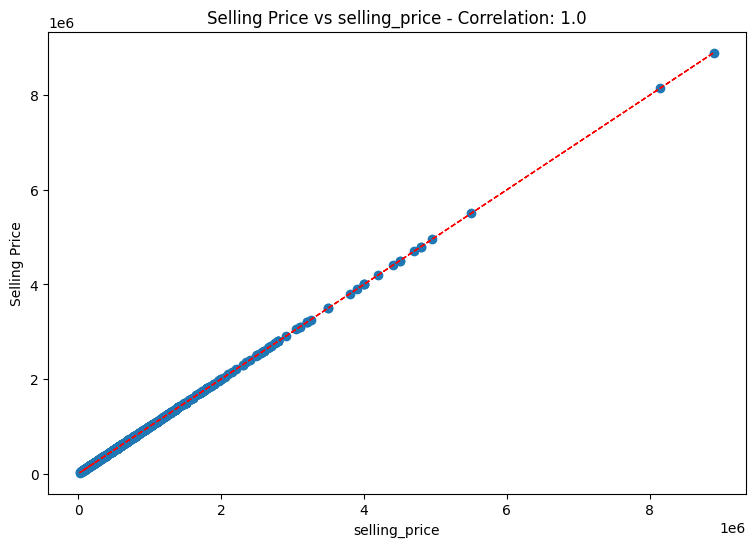

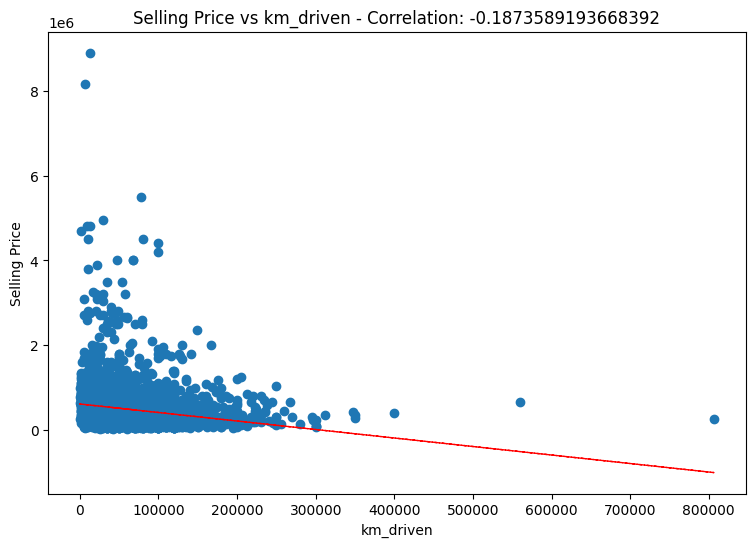

In [137]:
# Plotting scatter plot
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df_cardekho[col]
    label = df_cardekho['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    ax.set_title('Selling Price vs '+ col + ' - Correlation: '+ str(correlation))
    z = np.polyfit(df_cardekho[col], df_cardekho['selling_price'], 1)
    y_hat = np.poly1d(z)(df_cardekho[col])
    plt.plot(df_cardekho[col], y_hat, 'r--', lw=1)
plt.show()

From the analysis, we observe that most cars have driven less than 300,000 km. Therefore, we will set this as a boundary condition and treat any values exceeding this as outliers. For the Year column, we will focus on data from the past 15 years to ensure the development of a robust model.

###Removing outliers

In [138]:
# Keeping the year data above 2005
df_cardekho = df_cardekho[df_cardekho['year'] >= 2005]

In [139]:
# km_driven less than or equal to 300000
df_cardekho = df_cardekho[df_cardekho['km_driven'] <= 300000]

In [140]:
df_cardekho.reset_index(inplace=True)

In [141]:
del df_cardekho['index']

In [142]:
df_cardekho

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3434,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3435,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3436,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3437,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


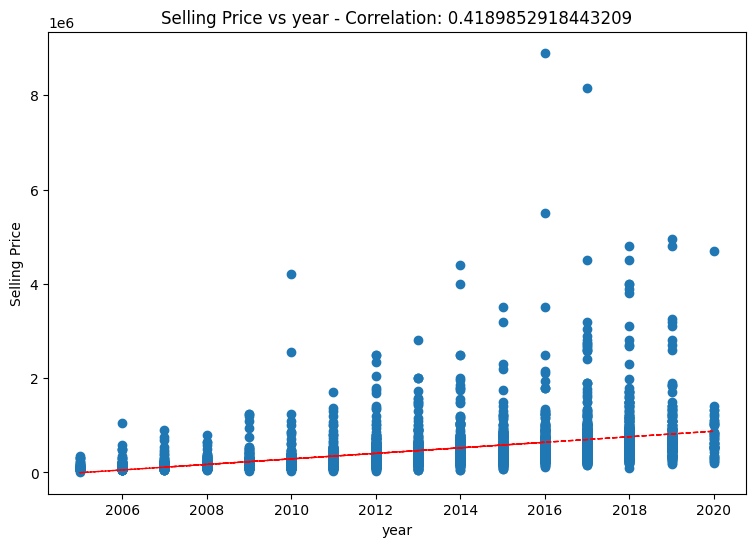

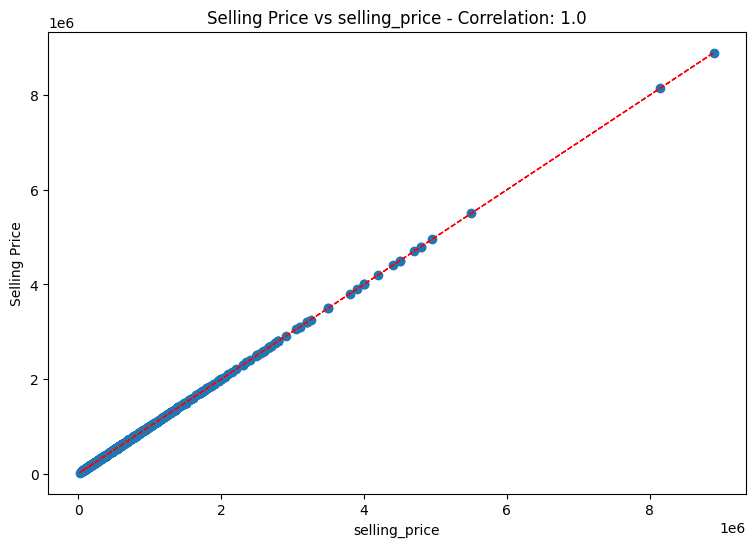

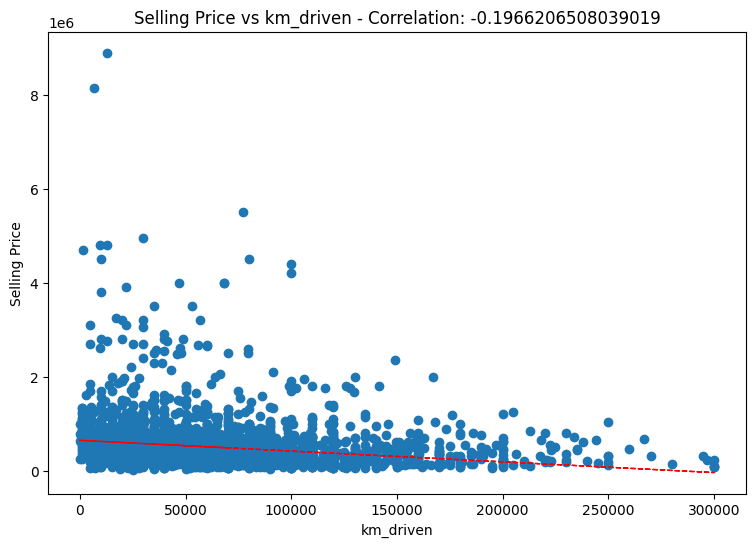

In [143]:
# Now plotting scatter plot
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df_cardekho[col]
    label = df_cardekho['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    ax.set_title('Selling Price vs '+ col + ' - Correlation: '+ str(correlation))
    z = np.polyfit(df_cardekho[col], df_cardekho['selling_price'], 1)
    y_hat = np.poly1d(z)(df_cardekho[col])
    plt.plot(df_cardekho[col], y_hat, 'r--', lw=1)
plt.show()

From the above scatterplot it is clear that there is a linear relationship -
* If KM driven increases the price of car decreases.
* For old cars the price is cheaper than the latest ones.

###Let's try to find and remove multicollinearity

In [144]:
# Removing multicollinear
df_cardekho['car_age'] = 2024 - df_cardekho['year']

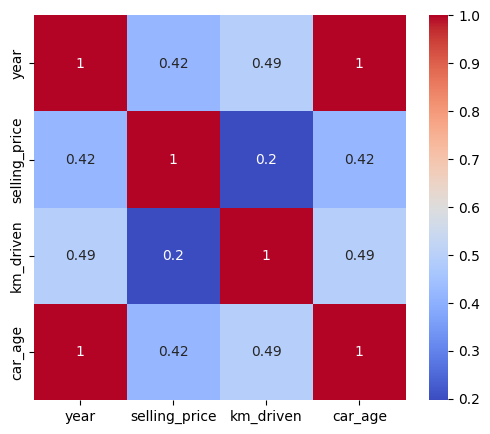

In [145]:
# Plotting a heatmap to understand the relationship between different variables
plt.figure(figsize=(6,5))
correlation = df_cardekho.corr(numeric_only=True)
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

We can see that car_age and year has strong relationship because they provide the same information so we can remove year ccolumn.<br>
km_driven has an average relathion with car_age so we will keep it as it is.

In [146]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [147]:
calc_vif(df_cardekho[[i for i in df_cardekho.describe().columns if i not in ['selling_price', 'year']]])

,variables,VIF
0,km_driven,4.453743
1,car_age,4.453743


VIF is 4.4537 which is good to proceed ahead and perform linear regression.

In [148]:
numerical_features = ['km_driven','car_age']

In [149]:
df_cardekho['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [150]:
df_cardekho['company'] = df_cardekho['name'].str.split(" ", expand=True)[0]
df_cardekho['company'] = df_cardekho['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
df_cardekho['company'] = df_cardekho['company'].str.title()
df_cardekho['company'].value_counts()

,count
company,
Maruti,998
Hyundai,618
Mahindra,316
Tata,304
Ford,216
Honda,207
Toyota,165
Chevrolet,150
Renault,110


In [151]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,17,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,17,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,12,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,7,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,10,Honda


###Analyzing categorical data

In [152]:
categorical_features = df_cardekho.describe(include=['object','category']).columns

In [153]:
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

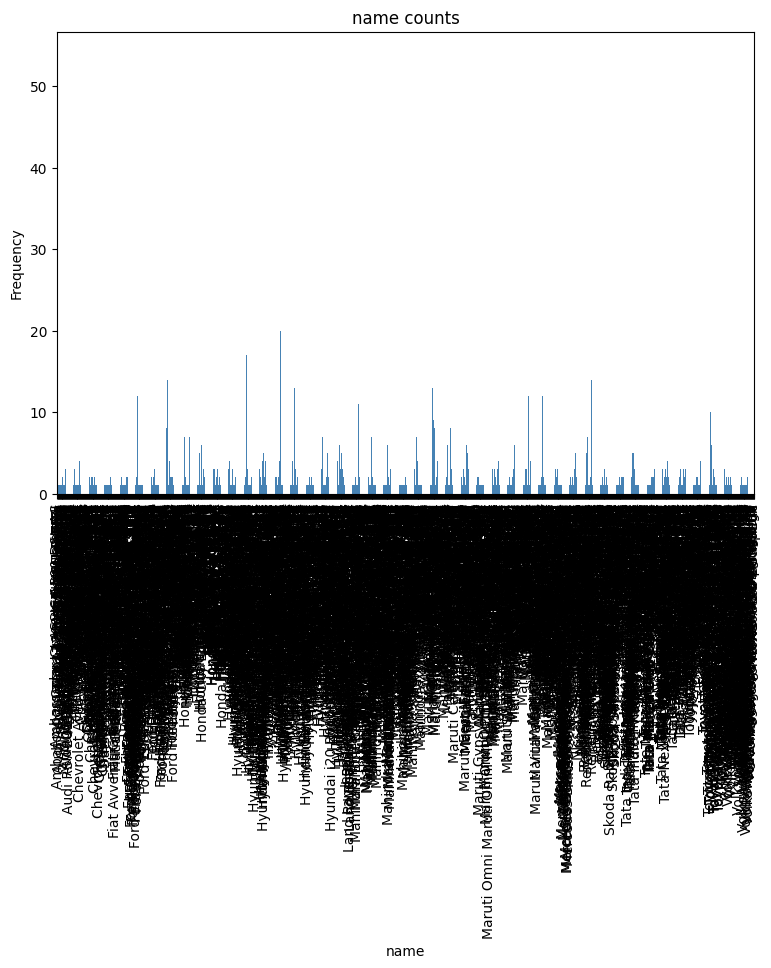

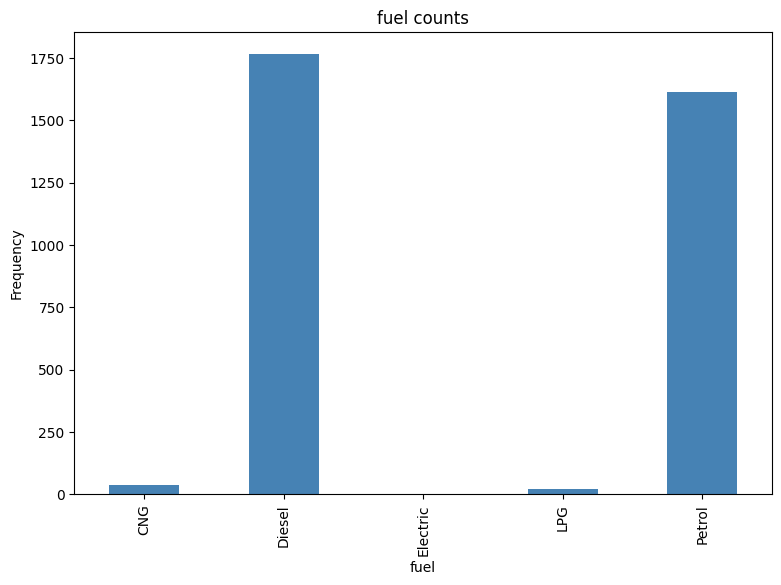

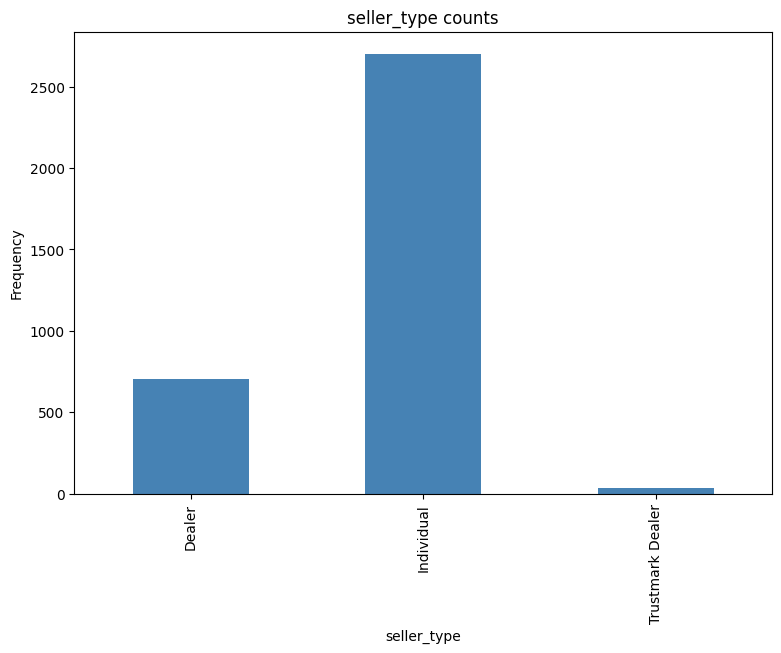

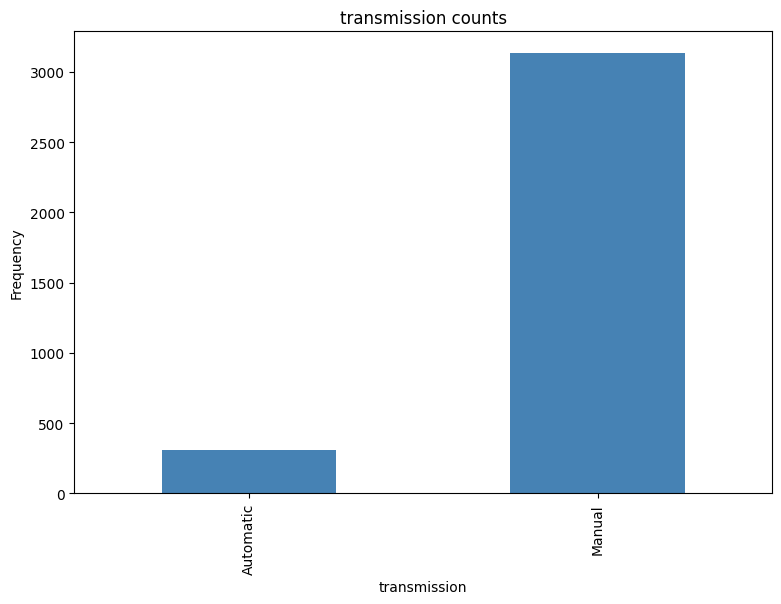

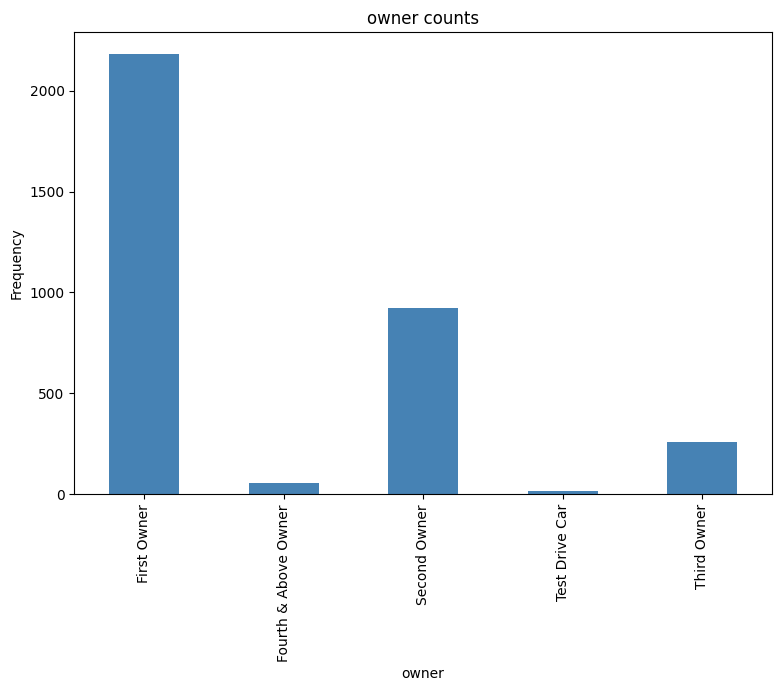

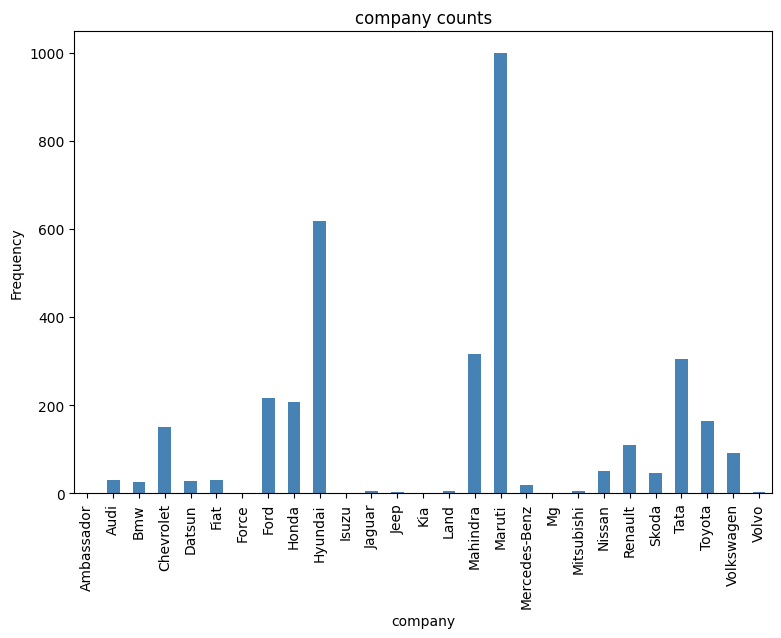

In [154]:
# Plotting countplot for each variable
for col in categorical_features:
    counts = df_cardekho[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

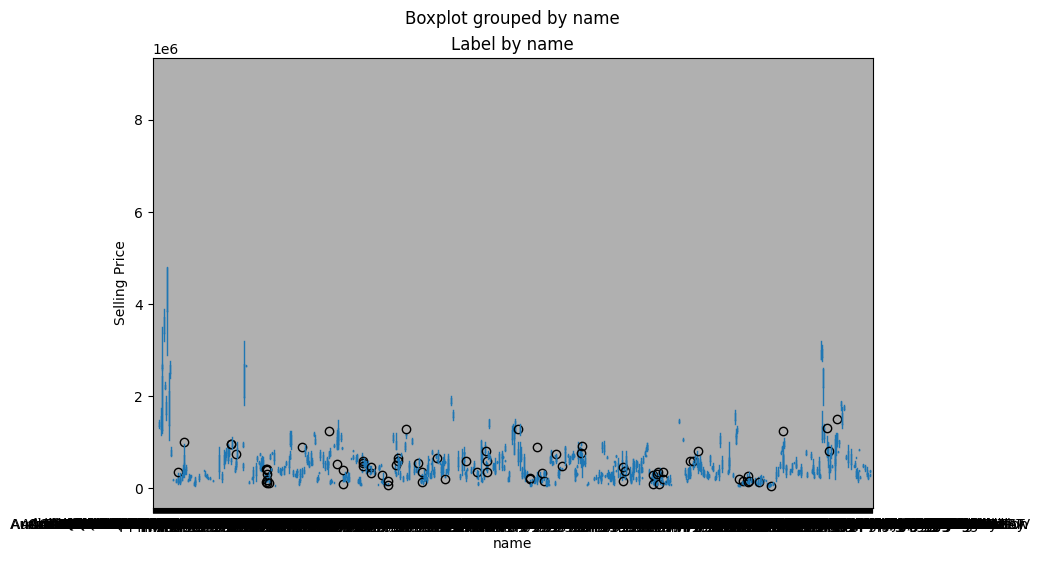

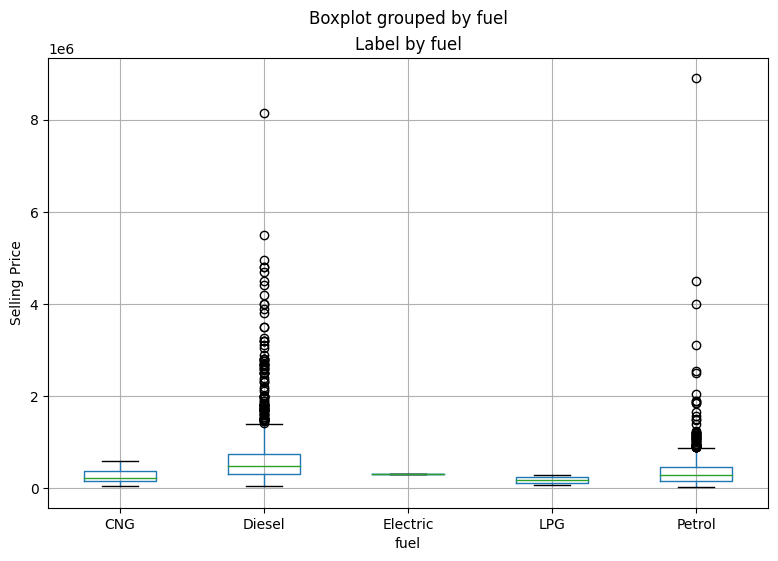

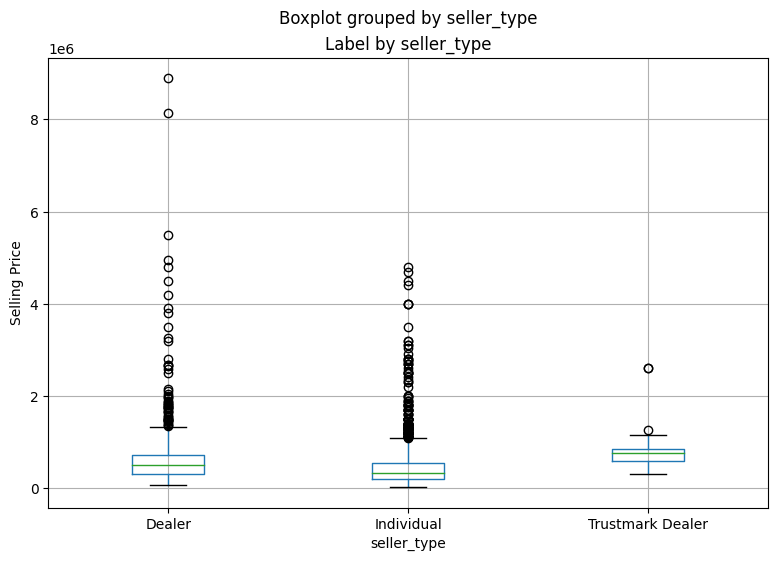

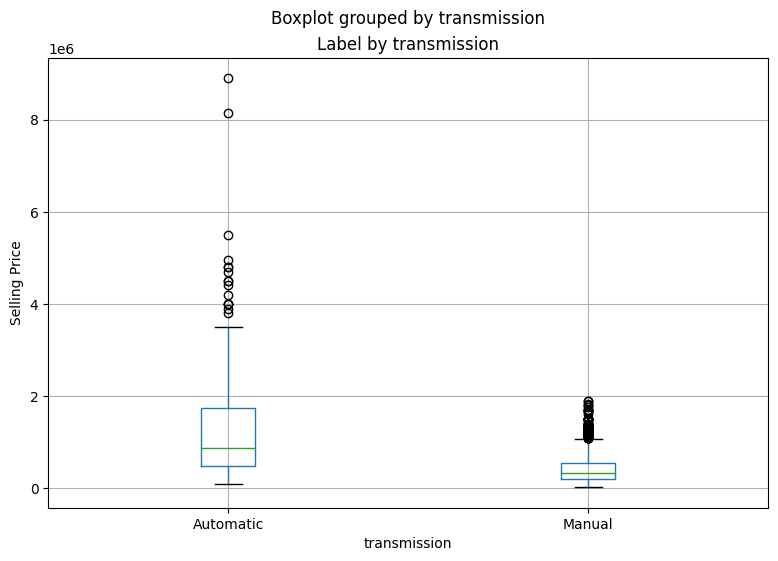

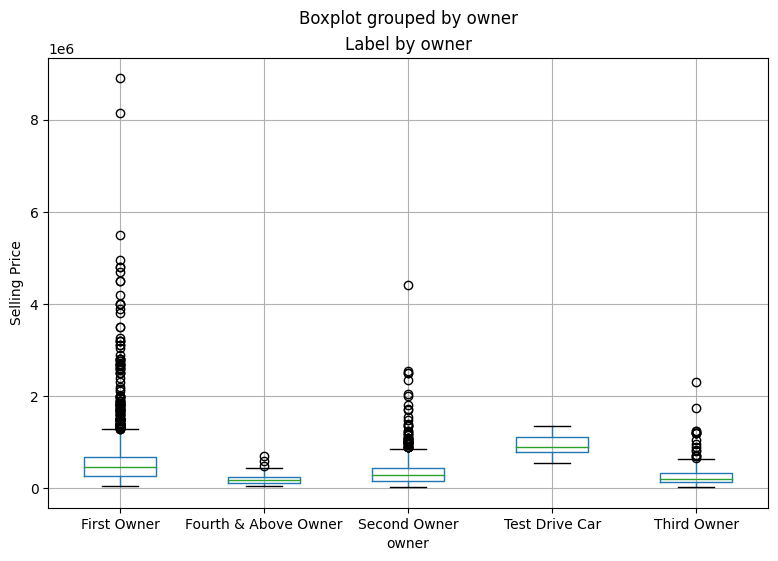

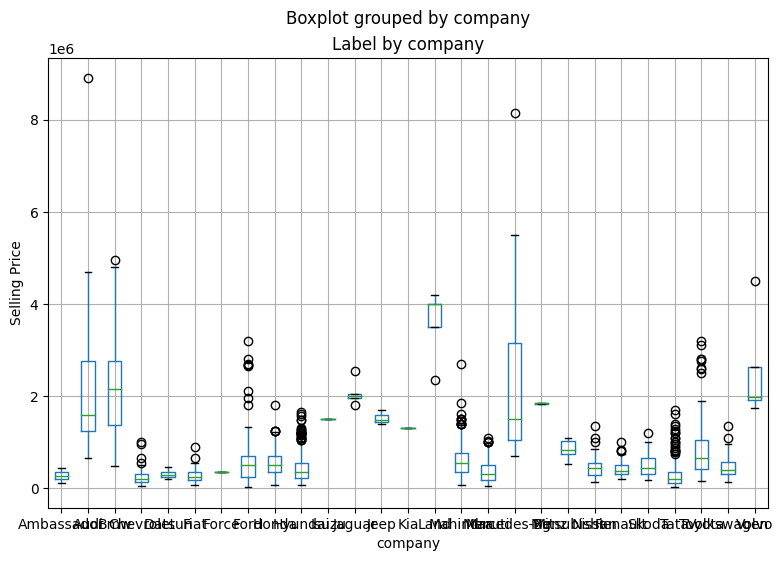

In [155]:
# Plotting boxplot to understand the distribution of the data
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df_cardekho.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Selling Price")
plt.show()

<Figure size 2000x600 with 0 Axes>

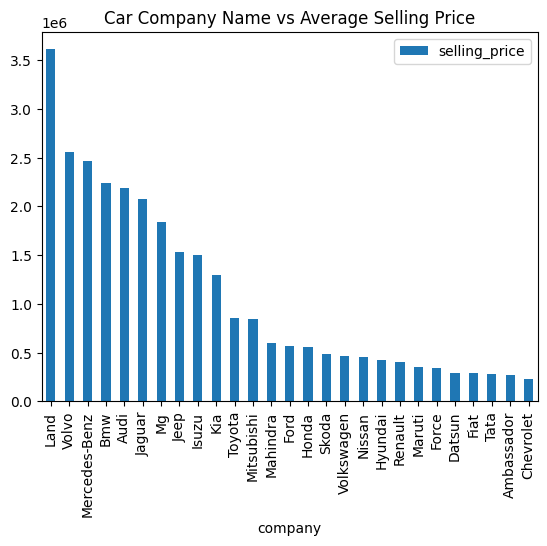

In [156]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df_cardekho.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Selling Price')
plt.show()

In [157]:
# Average selling price
df_autox.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

In [158]:
df_cardekho = df_cardekho.merge(df_autox,on = 'company',how = 'left')

In [159]:
df_cardekho['company_cat'] = df_cardekho['selling_price_mean'].apply(lambda x : 0 if x < 400000 else (1 if 400000 <= x < 700000 else 2))

In [160]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,company,selling_price_mean,company_cat
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,17,Maruti,350088.138277,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,17,Maruti,350088.138277,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,12,Hyundai,423640.728155,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,7,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,10,Honda,557067.584541,1


In [161]:
df_cardekho['company_cat'].value_counts()

,count
company_cat,
1,1658
0,1515
2,266


In [162]:
correlation.selling_price

,selling_price
year,0.418985
selling_price,1.000000
km_driven,-0.196621
car_age,-0.418985


###Preparing data

In [163]:
cardekho_copy = df_cardekho.copy()

###Feature engineering

Feature engineering is the process of transforming raw data into a more effective set of inputs for machine learning and statistical modeling. <br>
We shall convert categorical columns into numeric type.

In [164]:
cardekho_copy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_age', 'company', 'selling_price_mean',
       'company_cat'],
      dtype='object')

In [165]:
cardekho_copy['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [166]:
### Data encoding
#label encoding
encoders_nums = {
                  "owner":{"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3,"Test Drive Car":4}
                 }

cardekho_copy = cardekho_copy.replace(encoders_nums)

In [167]:
# One hot encoding
cardekho_copy = pd.get_dummies(cardekho_copy, dtype=int, columns=["fuel", "seller_type","transmission"], prefix=["Fuel_type", "Seller_type","Transmission"])

In [168]:
cardekho_copy.head()

,name,year,selling_price,km_driven,owner,car_age,company,selling_price_mean,company_cat,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Seller_type_Dealer,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Automatic,Transmission_Manual
0,Maruti 800 AC,2007,60000,70000,0,17,Maruti,350088.138277,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,17,Maruti,350088.138277,0,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,12,Hyundai,423640.728155,1,0,1,0,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,7,Datsun,296551.655172,0,0,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,10,Honda,557067.584541,1,0,1,0,0,0,0,1,0,0,1


In [170]:
cardekho_copy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'car_age',
       'company', 'selling_price_mean', 'company_cat', 'Fuel_type_CNG',
       'Fuel_type_Diesel', 'Fuel_type_Electric', 'Fuel_type_LPG',
       'Fuel_type_Petrol', 'Seller_type_Dealer', 'Seller_type_Individual',
       'Seller_type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [171]:
features = numerical_features.copy()
features.extend(['owner','selling_price_mean','company_cat', 'Fuel_type_CNG',
       'Fuel_type_Diesel', 'Fuel_type_Electric', 'Fuel_type_LPG',
       'Fuel_type_Petrol', 'Seller_type_Dealer', 'Seller_type_Individual',
       'Seller_type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'])

In [172]:
features

['km_driven',
 'car_age',
 'owner',
 'selling_price_mean',
 'company_cat',
 'Fuel_type_CNG',
 'Fuel_type_Diesel',
 'Fuel_type_Electric',
 'Fuel_type_LPG',
 'Fuel_type_Petrol',
 'Seller_type_Dealer',
 'Seller_type_Individual',
 'Seller_type_Trustmark Dealer',
 'Transmission_Automatic',
 'Transmission_Manual']

In [173]:
len(features)

15

In [174]:
from scipy.stats import zscore
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = cardekho_copy[features].apply(zscore)

In [175]:
y = np.log10(cardekho_copy['selling_price'])

###Implementing Linear Regression

In [177]:
# Splitting the dataset into train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(2751, 15)
(688, 15)


In [178]:
reg = LinearRegression().fit(X_train, y_train)

In [180]:
reg.score(X_train, y_train)

0.7446889880534729

In [181]:
reg.coef_

array([-1.26871157e-02, -1.93072021e-01, -1.21969542e-02,  8.04359640e-02,
        5.62980696e-02, -5.23217771e+10, -2.53488225e+11, -8.64703877e+09,
       -3.95102836e+10, -2.53103220e+11, -5.57248845e+12, -5.66728949e+12,
       -1.34707805e+12, -4.84982691e+11, -4.84982691e+11])

In [183]:
len(reg.coef_)

15

In [182]:
y_pred = reg.predict(X_test)

###Regression Evaluation Metrics

In [185]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 60127820660.07867
MAE : 139489.69687487432
RMSE : 245209.74829740898


In [186]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7825421437090249
Adjusted R2 :  0.7776881737025299


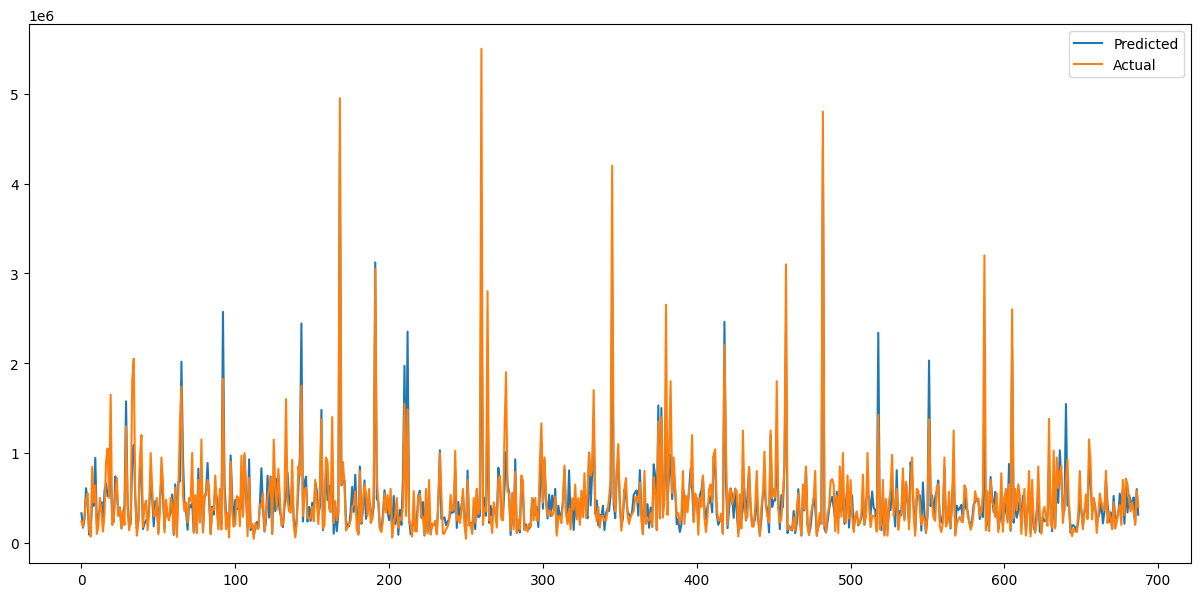

In [191]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

From the above graph we can say that the prediction is good with a R2 score 0f 0.78


###Residual Analysis


A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line.

Text(0.5, 0.98, 'Residual Analysis')

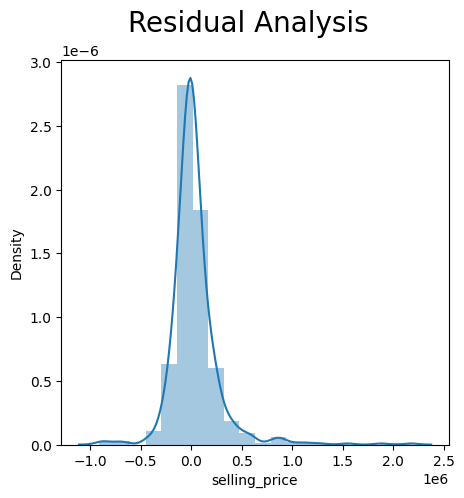

In [194]:
fig=plt.figure(figsize=(5,5))

sns.distplot((10**(y_test)- 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'Residuals')

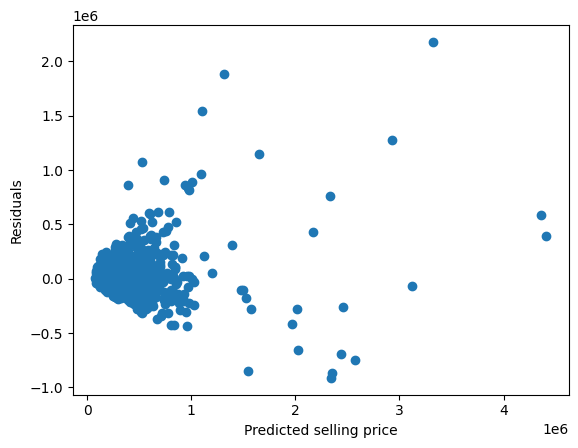

In [196]:
# Let's try to fing heteroscedasticity
plt.scatter(10**(y_pred),10**(y_test)-10**(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('Residuals')

In [201]:
import statsmodels.api as sm
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [202]:
# Printing the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     852.9
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:03:15   Log-Likelihood:                 1220.2
No. Observations:                3439   AIC:                            -2414.
Df Residuals:                    3426   BIC:                            -2335.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.5511      0.003   1914.700      0.000       5.545       5.557
km_driven                       -0.0142      0.004     -3.795      0.000      -0.022      -0.007
car_age                         -0.1909      0.004    -52.405      0.000      -0.198      -0.184
owner                           -0.0133      0.003     -4.161      0.000      -0.019      -0.007
selling_price_mean               0.0785      0.004     18.040      0.000       0.070       0.087
company_cat                      0.0586      0.004     14.804      0.000       0.051       0.066
Fuel_type_CNG                   -0.0094      0.003     -3.291      0.001      -0.015      -0.004
Fuel_type_Diesel                 0.0446      0.002     26.372      0.000       0.041       0.048
Fuel_type_Electric              -0.0007      0.003     -0.249      0.804      -0.006       0.005
Fuel_type_LPG                   -0.0091      0.003     -3.184      0.001      -0.015      -0.004
Fuel_type_Petrol                -0.0413      0.002    -24.431      0.000      -0.045      -0.038
Seller_type_Dealer               0.0075      0.002      4.738      0.000       0.004       0.011
Seller_type_Individual          -0.0106      0.002     -6.929      0.000      -0.014      -0.008
Seller_type_Trustmark Dealer     0.0134      0.003      4.738      0.000       0.008       0.019
Transmission_Automatic           0.0209      0.002     12.280      0.000       0.018       0.024
Transmission_Manual             -0.0209      0.002    -12.280      0.000      -0.024      -0.018
==============================================================================
Omnibus:                       46.686   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.124
Skew:                          -0.156   Prob(JB):                     2.66e-15
Kurtosis:                       3.609   Cond. No.                     1.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###Implementing Lasso Regression

In [203]:
# Lasso implementation
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [204]:
lasso.score(X_train, y_train)

0.7448439855876126

In [208]:
lasso.coef_

array([-1.37069182e-02, -1.93667441e-01, -1.10107597e-02,  7.97687035e-02,
        5.68426871e-02, -6.07094753e-05,  8.25815927e-02,  6.97852373e-04,
       -4.29112276e-03, -0.00000000e+00,  0.00000000e+00, -1.86364184e-02,
        1.09103070e-02,  4.07026835e-02, -0.00000000e+00])

In [206]:
y_pred_lasso = lasso.predict(X_test)

In [207]:
# Evaluation metrics
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60051999627.026596
MAE : 139685.17019615482
RMSE : 245055.0950848127
R2 : 0.7828163575276578
Adjusted R2 :  0.7779685083653287


Text(0, 0.5, 'Predicted selling price')

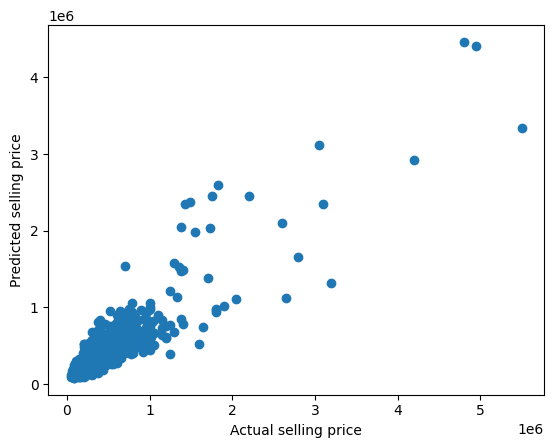

In [210]:
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

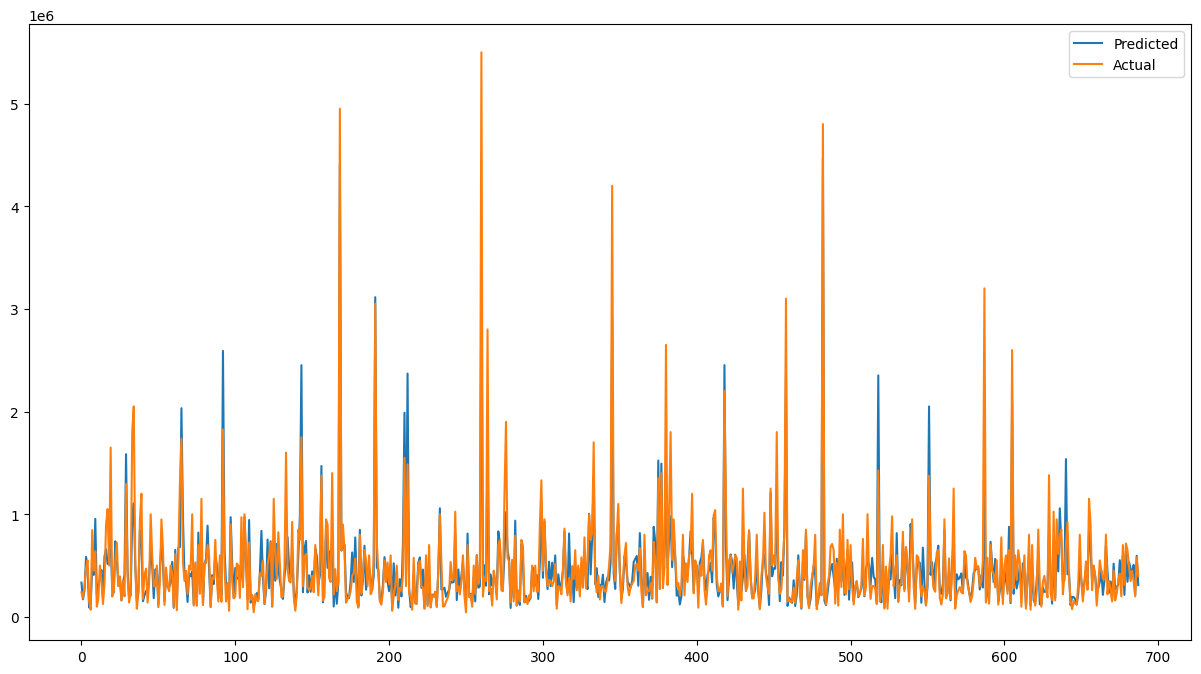

In [212]:
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred_lasso))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

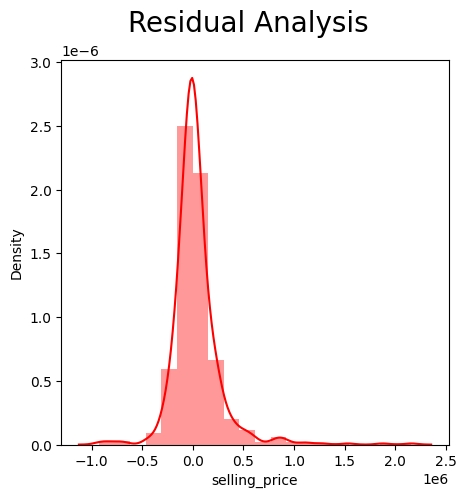

In [214]:
#Resuldual Analysis
fig=plt.figure(figsize=(5,5))

sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

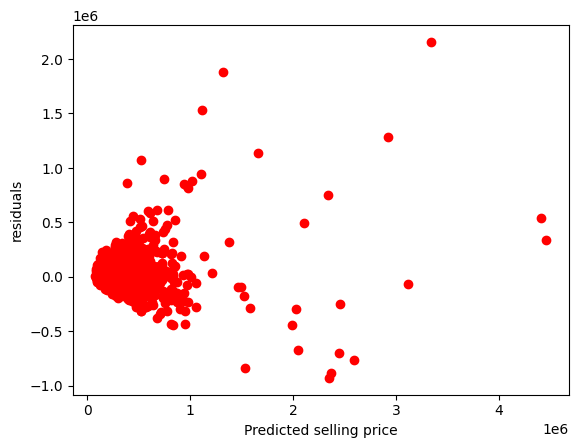

In [217]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

###Cross Validation Procedure for Lasso

In [224]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [225]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.02977214723995041


In [226]:
y_pred_lassocv = lasso_regressor.predict(X_test)

In [227]:
# Evaluation metrics
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lassocv))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lassocv))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 60051999627.026596
MAE : 139685.17019615482
RMSE : 245055.0950848127


In [228]:
r2 = r2_score(10**(y_test), 10**(y_pred_lassocv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lassocv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7828163575276578
Adjusted R2 :  0.7779685083653287


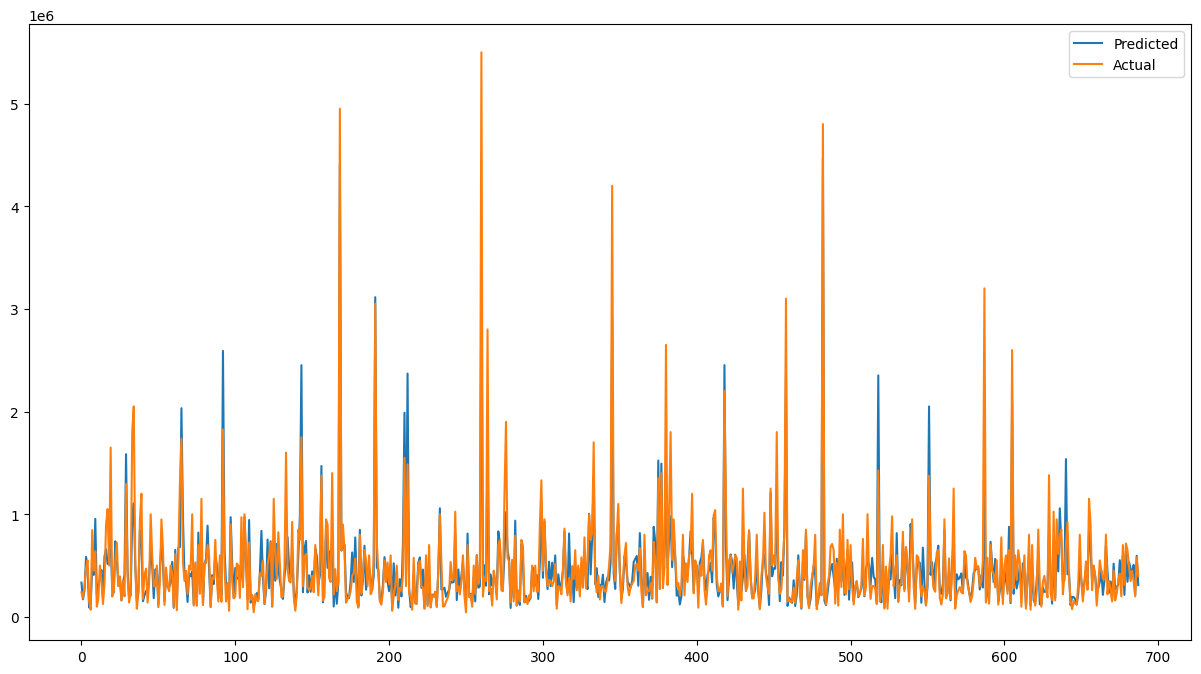

In [231]:
plt.figure(figsize=(15, 8))
plt.plot(10**(y_pred_lassocv))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

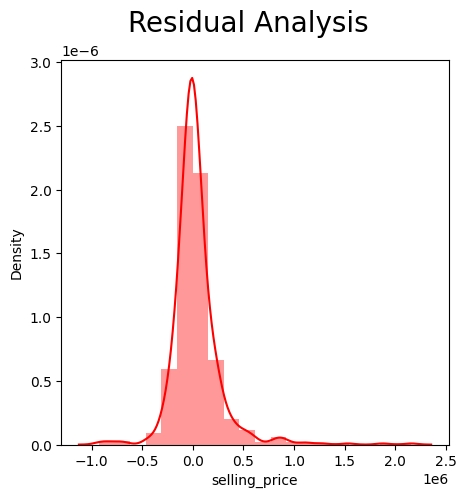

In [233]:
#Resuldual Analysis
fig=plt.figure(figsize=(5,5))

sns.distplot((10**(y_test)- 10**(y_pred_lassocv)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

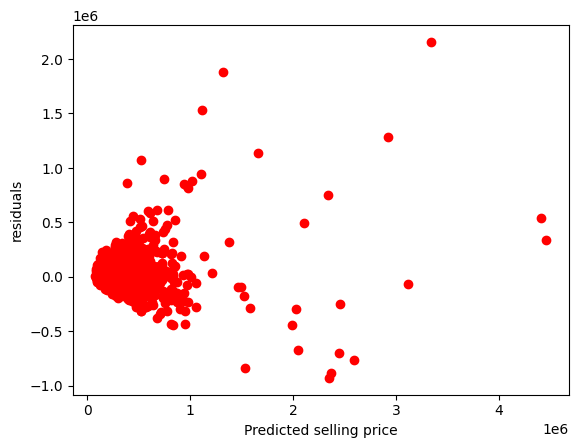

In [234]:
### Heteroscadacity
plt.scatter(10**(y_pred_lassocv),10**(y_test)-10**(y_pred_lassocv),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

###Implementing Ridge Regression

Ridge regression is a linear regression technique that includes a regularization term to prevent overfitting by penalizing large coefficients. This regularization term is the L2 norm, which adds the squared magnitude of the coefficients to the loss function. By doing so, Ridge regression helps in managing multicollinearity and improving the model's generalization to new data.

In [235]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [236]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [237]:
ridge.score(X_train, y_train)

0.7448446014587842

In [238]:
y_pred_r = ridge.predict(X_test)

In [239]:
# Evaluation metrics
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 60001851024.518394
MAE : 139678.17535222453
RMSE : 244952.75263715326


In [240]:
r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7829977246132714
Adjusted R2 :  0.7781539238233891


Text(0, 0.5, 'Predicted selling price')

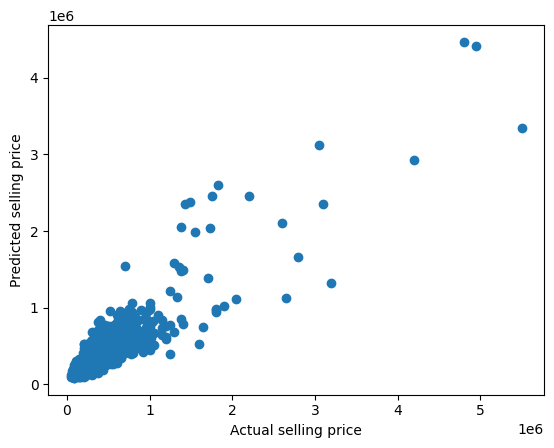

In [246]:
plt.scatter(10**(y_test), 10**(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

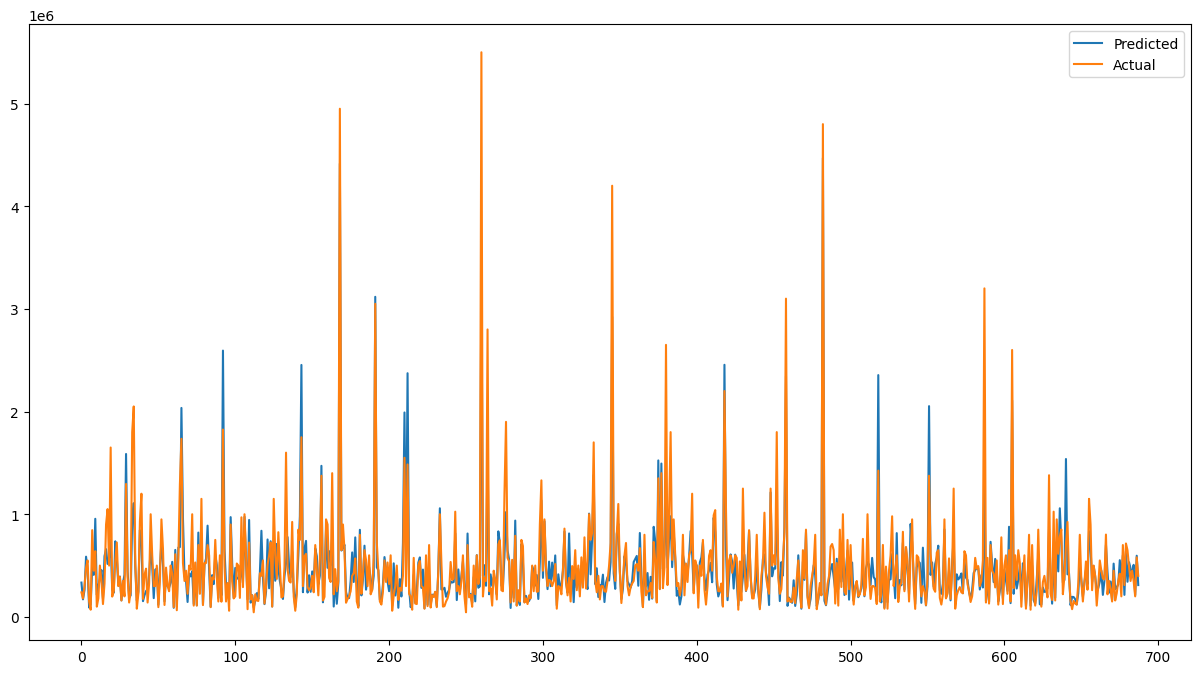

In [242]:
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

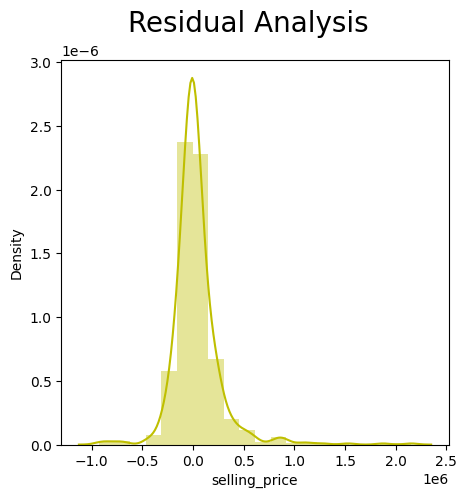

In [244]:
#Resuldual Analysis
fig=plt.figure(figsize=(5,5))

sns.distplot((10**(y_test)- 10**(y_pred_r)),bins=20,color='y')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

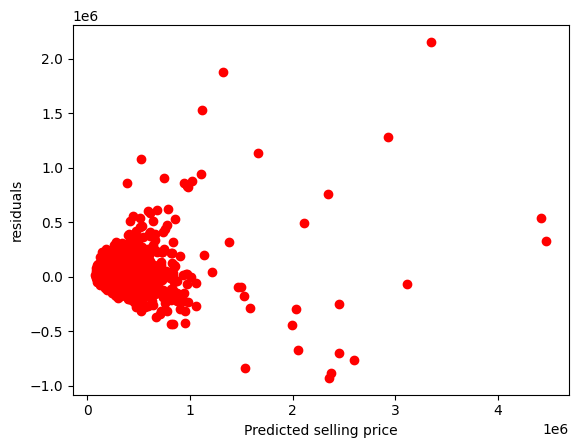

In [245]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

###Gride search cross validation for Ridge regression

In [247]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [248]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.029723347409518586


In [249]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [250]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 60076102081.42453
RMSE : 245104.2677748075


In [251]:
r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7827291887594039
Adjusted R2 :  0.7778793938656405


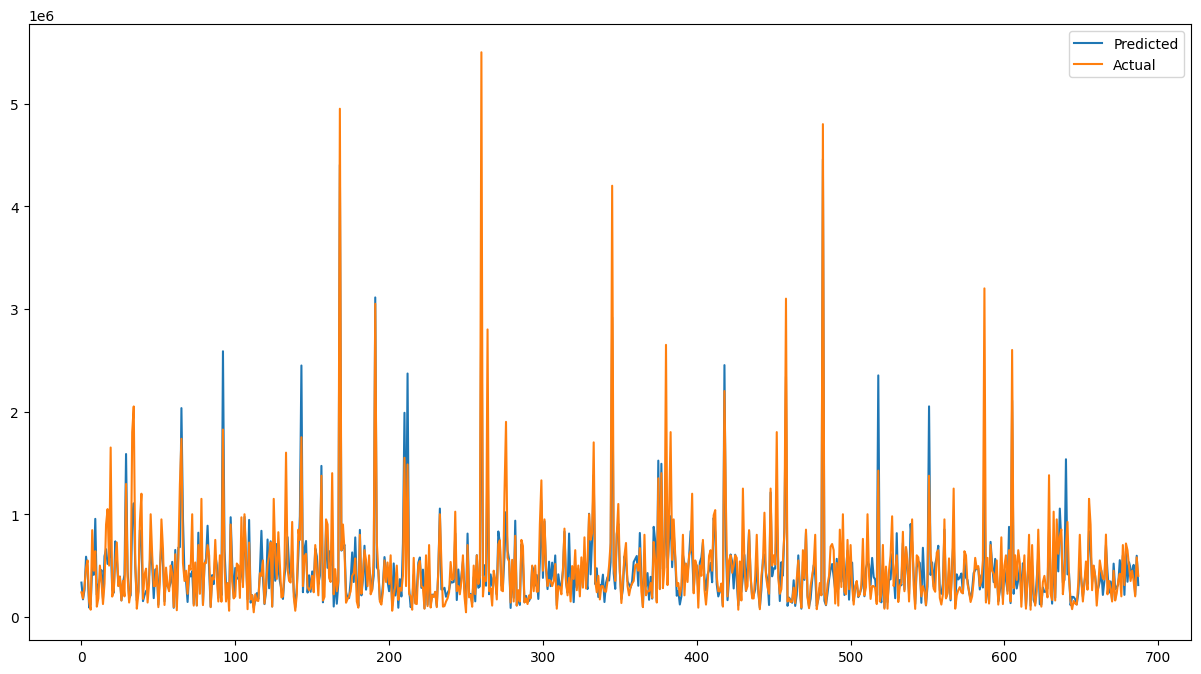

In [252]:
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

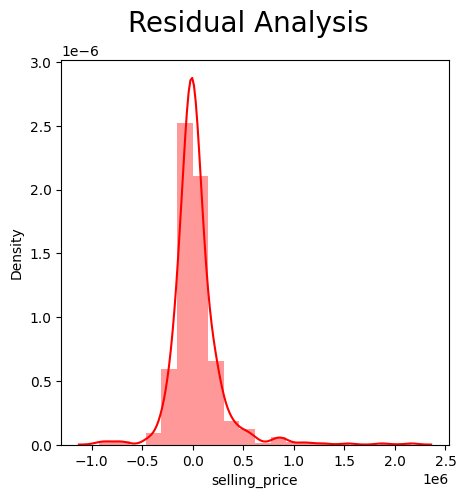

In [255]:
#Resuldual Analysis
fig=plt.figure(figsize=(5,5))

sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

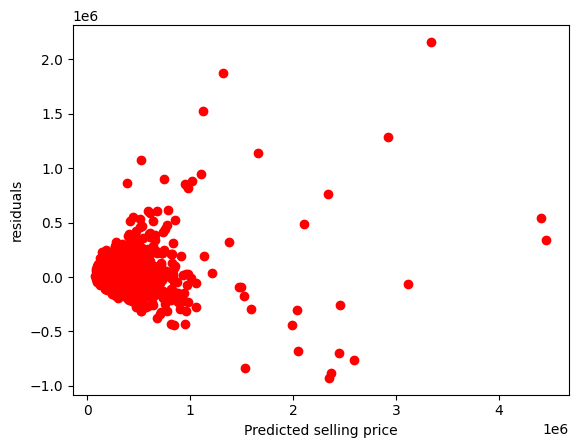

In [254]:
### Heteroscadacity
plt.scatter(10**(y_pred_ridge),10**(y_test)-10**(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

###ElasticNet Implementation

In [256]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [257]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [258]:
y_pred_en = elasticnet.predict(X_test)

In [259]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 138679984850.7779
RMSE : 372397.61660190293
R2 : 0.4984509352733356
Adjusted R2 :  0.48725564364997254


Text(0, 0.5, 'Predicted selling price')

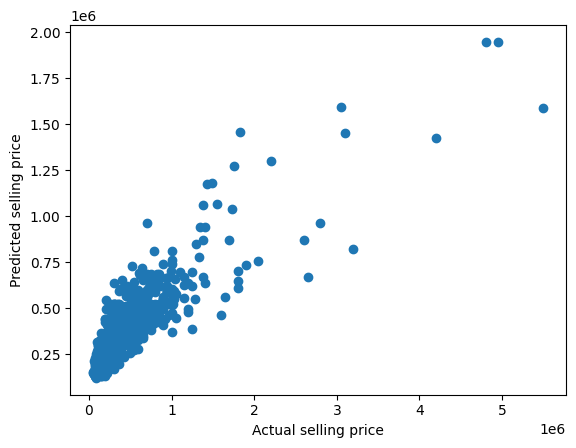

In [260]:
plt.scatter(10**(y_test), 10**(y_pred_en))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

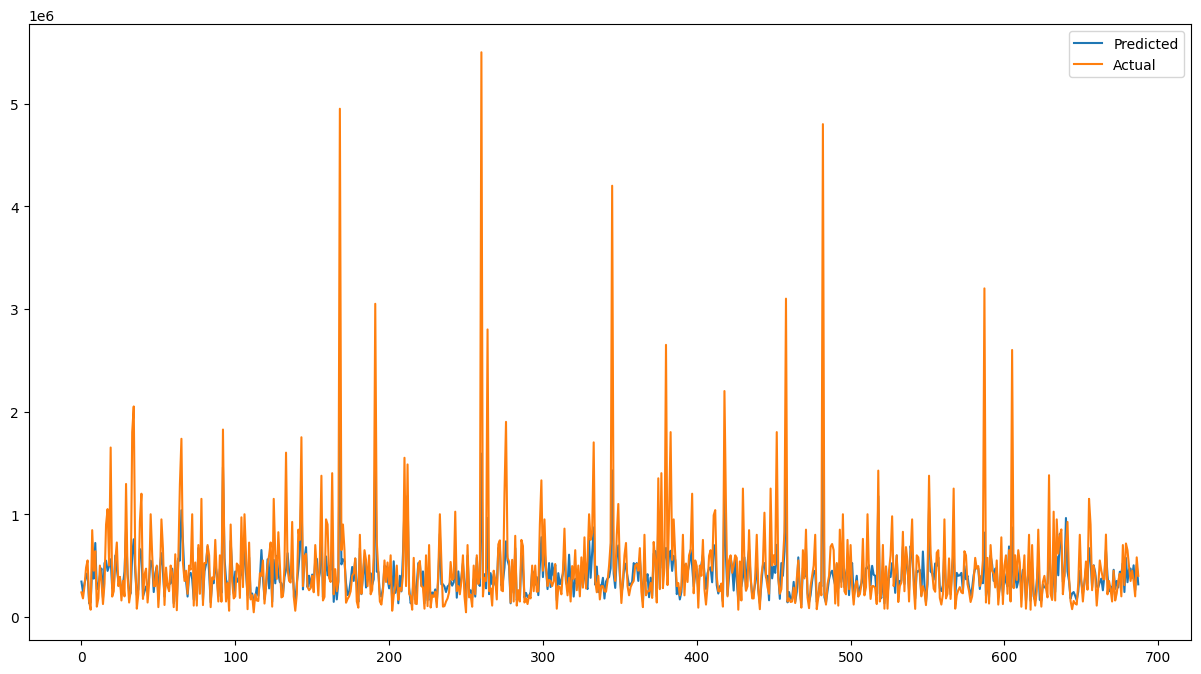

In [262]:
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

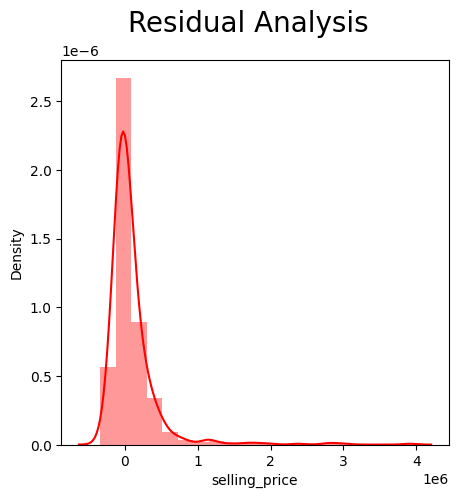

In [274]:
#Resuldual Analysis
fig=plt.figure(figsize=(5,5))

sns.distplot((10**(y_test)- 10**(y_pred_en)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

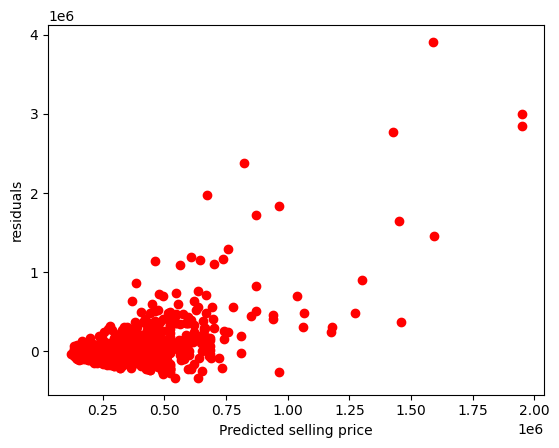

In [275]:
### Heteroscadacity
plt.scatter(10**(y_pred_en),10**(y_test)-10**(y_pred_en),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

###Grid search cross validation for ElasticNet

In [263]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [264]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.5}

Using  {'alpha': 0.001, 'l1_ratio': 0.5}  the negative mean squared error is:  -0.029669806791431403


In [265]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [266]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60287793501.664406
RMSE : 245535.7275462461
R2 : 0.7819635870473313
Adjusted R2 :  0.7770967028296377


Text(0, 0.5, 'Predicted selling price')

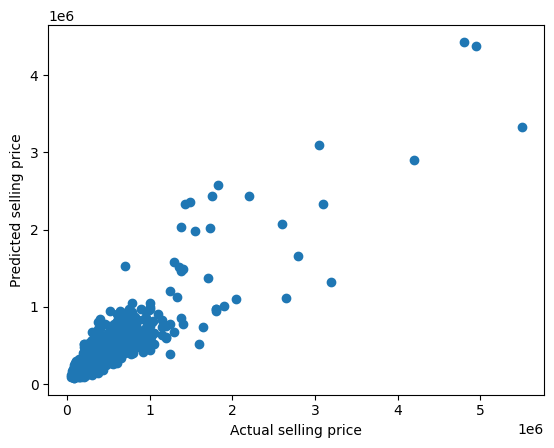

In [269]:
plt.scatter(10**(y_test), 10**(y_pred_elastic))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

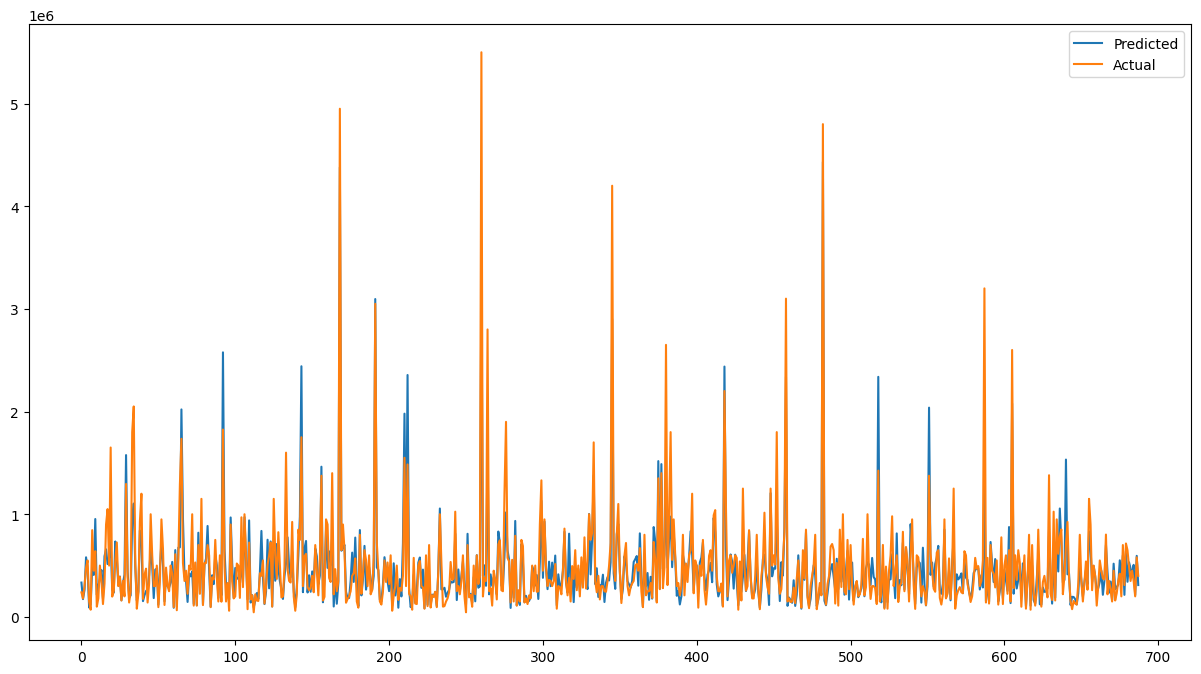

In [268]:
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

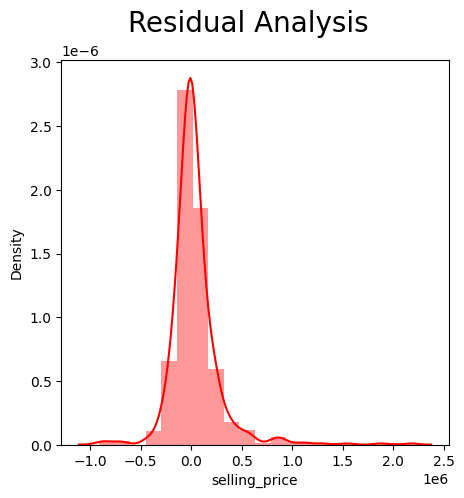

In [271]:
#Resuldual Analysis
fig=plt.figure(figsize=(5,5))

sns.distplot((10**(y_test)- 10**(y_pred_elastic)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

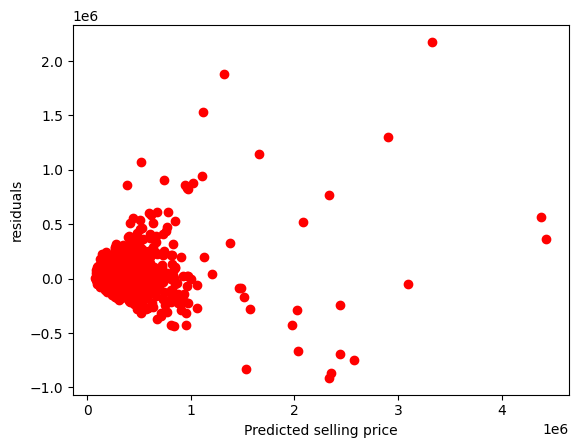

In [276]:
### Heteroscadacity
plt.scatter(10**(y_pred_elastic),10**(y_test)-10**(y_pred_elastic),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

###Conclusion
---
Ridge Regression performs the best with the following metrics-<br>
* MSE : 60076102081.42453
* RMSE : 245104.2677748075
* R2 : 0.7827291887594039
* Adjusted R2 :  0.7778793938656405

For this dataset ElasticNet performs the worst.<br>

We can conclude the following-

* Automatic vehicles tend to have higher resale prices compared to manual ones.
* The age of the vehicle is negatively correlated with the selling price, indicating that older vehicles are sold at lower prices.
* The number of past owners and the kilometers driven show very little correlation with the selling price.
* Cars with CNG fuel type have a higher resale value compared to those with other fuel types.
* The average price of a car significantly influences the selling price prediction, with both being highly correlated and directly proportional.